In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [36]:
data = pd.read_csv("C:/Users/Mohammed Qadir/Downloads/ProblemStatement_2.csv")

In [37]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [38]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables (Geography, Gender) into numerical representation
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Handle missing values (if any)
# Example: Fill missing values in the Balance column with the mean of the column
data['Balance'].fillna(data['Balance'].mean(), inplace=True)

In [39]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


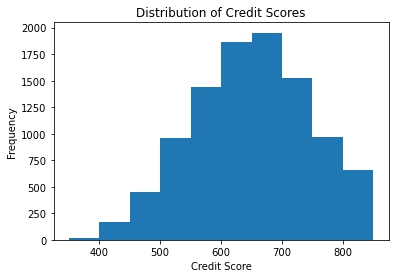

In [40]:
# Plot a histogram of the CreditScore column
plt.hist(data['CreditScore'])
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.show()

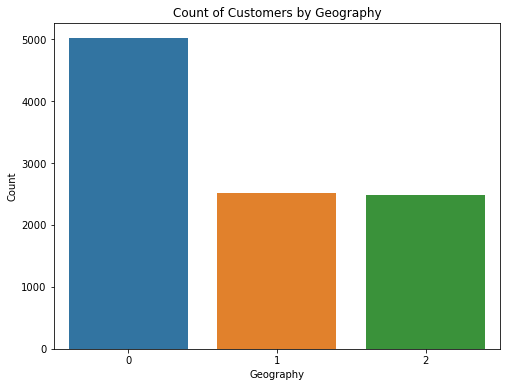

In [41]:
# Plot a bar chart of the count of customers by Geography
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Customers by Geography')
plt.show()


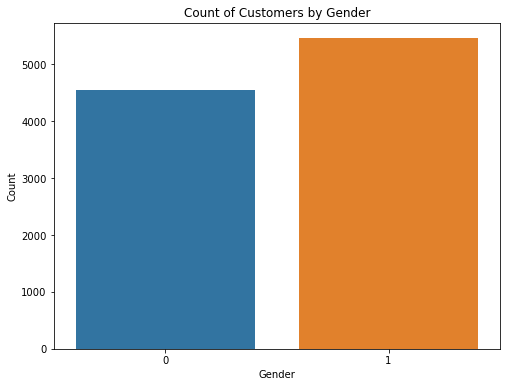

In [42]:
# Plot a bar chart of the count of customers by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')
plt.show()

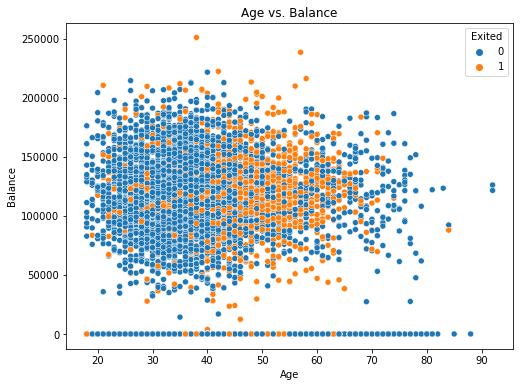

In [43]:
# Create a scatter plot of Age vs. Balance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Balance', hue='Exited')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance')
plt.show()

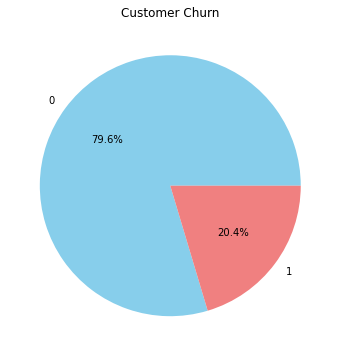

In [44]:
plt.figure(figsize=(6, 6))
data['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Customer Churn')
plt.ylabel('')
plt.show()

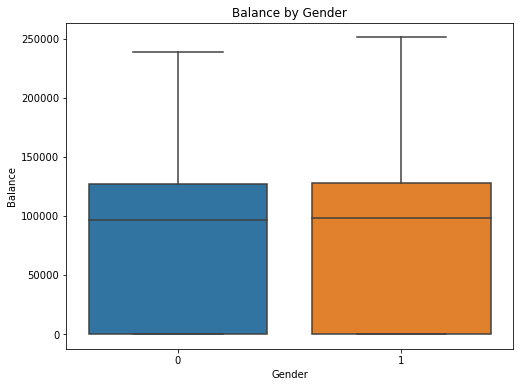

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Balance')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.title('Balance by Gender')
plt.show()

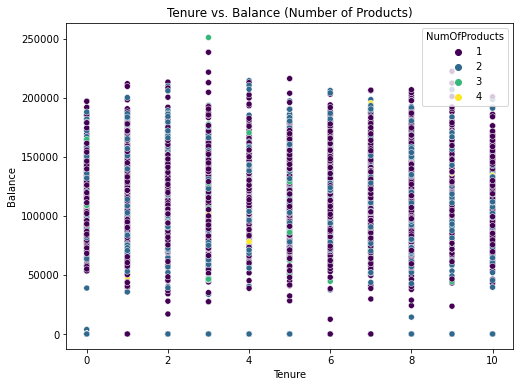

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Tenure', y='Balance', hue='NumOfProducts', palette='viridis')
plt.xlabel('Tenure')
plt.ylabel('Balance')
plt.title('Tenure vs. Balance (Number of Products)')
plt.show()

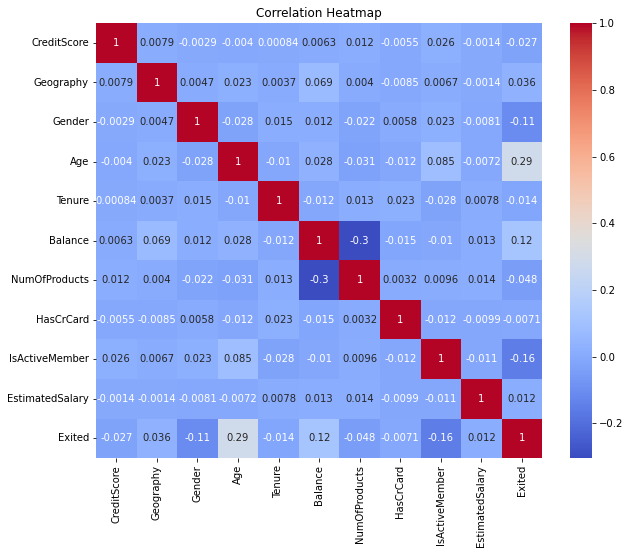

In [48]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [49]:
scaler = StandardScaler()
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [50]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


In [51]:
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model=RandomForestClassifier()

In [74]:
model.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [75]:
y_pred = model.predict(X_test_encoded)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest algorithm Accuracy:", accuracy)

Random Forest algorithm Accuracy: 0.864


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [78]:
modellog = LogisticRegression()

# Train the model on the training data
modellog.fit(X_train, y_train)

# Make predictions on the testing data
y_predlog = modellog.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_predlog)
precision = precision_score(y_test, y_predlog)
recall = recall_score(y_test, y_predlog)
f1 = f1_score(y_test, y_predlog)

# Print the evaluation metrics
print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression Accuracy: 0.8155
Precision: 0.6
Recall: 0.183206106870229
F1-score: 0.2807017543859649


In [79]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier
modelgrad = GradientBoostingClassifier()

# Train the model
modelgrad.fit(X_train, y_train)

GradientBoostingClassifier()

In [81]:
# Make predictions on the test set
y_predgrad = modelgrad.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predgrad)
print("Accuracy:", accuracy)

Accuracy: 0.8655


In [82]:
from sklearn.tree import DecisionTreeClassifier
modeldec = DecisionTreeClassifier()

# Train the model
modeldec.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
# Make predictions on the test set
y_preddec = modeldec.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preddec)
print("Accuracy:", accuracy)

Accuracy: 0.7855


In [84]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Sequential model
models = Sequential()

# Add layers to the model
models.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
models.add(Dense(64, activation='relu'))
models.add(Dense(1, activation='sigmoid'))

In [90]:
# Compile the model
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
models.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.8798 - val_loss: 0.3425 - val_accuracy: 0.8615
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8805 - val_loss: 0.3480 - val_accuracy: 0.8605
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.8842 - val_loss: 0.3528 - val_accuracy: 0.8575
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8832 - val_loss: 0.3481 - val_accuracy: 0.8645
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8834 - val_loss: 0.3468 - val_accuracy: 0.8645
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8826 - val_loss: 0.3487 - val_accuracy: 0.8660
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8835 - val_loss: 0.3515 - val_accuracy: 0.8610
Epoch 

In [91]:
# Evaluate the model
y_probs = models.predict(X_test)
y_preds = np.round(y_probs)
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

63/63 [==============================] - 0s 976us/step
Accuracy: 0.8575


In [ ]:
#1)Identify high-risk customers: Use the churn prediction model to identify customers who are predicted to churn with a 
# high probability These customers will be the focus of your retention efforts.
#2)Understand customer needs and preferences: Analyze the historical data and customer profiles to gain insights into 
# the needs, preferences, and behaviors of high-risk customers. Look for patterns or indicators that can help you tailor 
# your retention strategies.
#3)Gather customer data: Collect additional information about high-risk customers, such as their transaction history, 
# interaction patterns, customer service inquiries, or feedback. This data will help you understand their specific needs 
# and behaviors.
#4)Segment customers: Divide high-risk customers into segments based on common characteristics or preferences. 
# This segmentation allows you to tailor retention strategies for each group.
#5)Personalize offers and incentives: Develop personalized offers and incentives that address the individual needs of 
# high-risk customers. Consider factors such as their financial goals, transaction patterns, or life events. Offer customized product recommendations, loyalty rewards, or discounts that align with their preferences.
#6)Enhance customer experience: Identify areas where you can improve the overall customer experience for high-risk 
# customers. This might involve streamlining account opening processes, simplifying digital banking interfaces, or 
# providing dedicated support channels. Aim to make interactions with your bank seamless and frictionless.
#7)Proactive communication: Implement proactive communication initiatives to engage with high-risk customers. Reach out to
# them through targeted marketing campaigns, personalized emails, or notifications that address their concerns, offer relevant information, or provide assistance. Regularly share updates about new products, services, or features that align with their needs.
#8)Loyalty programs: Develop loyalty programs specifically designed for high-risk customers. Provide exclusive benefits, 
# rewards, or access to premium services based on their loyalty and engagement. Consider offering personalized financial advice, discounts on banking fees, or priority customer support.
#9)Financial education and guidance: Offer financial education resources and guidance to high-risk customers. Provide 
# access to educational content, webinars, or personalized financial planning sessions. Empower them to make informed decisions and build a stronger relationship with your bank.
#10)Continuous monitoring and feedback: Regularly monitor the effectiveness of your retention strategies by tracking 
# customer engagement and feedback. Utilize customer surveys, feedback forms, or social media monitoring to gather insights. Adjust your strategies based on customer responses and evolving needs.
#11)Measure and track success: Define key performance indicators (KPIs) to measure the success of your retention 
# strategies. Monitor metrics such as customer retention rates, customer satisfaction scores, cross-selling or 
# upselling rates, or the lifetime value of retained customers. Use this data to assess the impact of your efforts
# and make data-driven improvements.